<a href="https://colab.research.google.com/github/manishbhatt5/EDA-Hotel-booking-analysis-project/blob/main/Hotel_Bookings_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Bookings Exploratory Data Analysis**

### *Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.*

# **Objective**

We are provided with a hotel bookings dataset.

Our main objective is to perform EDA on the given dataset and draw useful conclusions about general trends in hotel bookings and how factors governing hotel bookings interact with each other.

In [ ]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Dataset**

We are given a hotel bookings dataset. This dataset contains booking information for a city hotel and a resort hotel. We will fetch this data set below:

In [ ]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_hotel = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')
df_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


**This dataset has 119390 rows and 32 columns.**

In [ ]:
df_hotel.head()    #This will display top 5 rows of the dataset.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df_hotel.describe()   #This will describe various parameters like count, mean max etc.

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.

**This dataset contains following features:**


 1   hotel                           
 2   is_canceled                       
 3   lead_time                         
 4   arrival_date_year               
 5   arrival_date_month               
 6   arrival_date_week_number          
 7   arrival_date_day_of_month         
 8   stays_in_weekend_nights           
 9   stays_in_week_nights              
 10   adults                            
 11  children                        
 12  babies                            
 13  meal                             
 14  country                          
 15  market_segment                   
 16  distribution_channel             
 17  is_repeated_guest                 
 18  previous_cancellations            
 19  previous_bookings_not_canceled    
 20  reserved_room_type               
 21  assigned_room_type               
 22  booking_changes                   
 23  deposit_type                     
 24  agent                           
 25  company                         
 26  days_in_waiting_list              
 27  customer_type                    
 28  adr                             
 29  required_car_parking_spaces       
 30  total_of_special_requests         
 31  reservation_status               
 32  reservation_status_date

In [ ]:
df_hotel.info()  #This will provide information for all coloumns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Create a copy of Hotel data, so that we will ammend everything in the copy:
df1 = df_hotel.copy()
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Now, we have complete data with us and in this data we have many null values and different columns. We will try to understand some unique columns below:

In [ ]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df1['is_canceled'].unique()

array([0, 1])

In [ ]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

# **Cleaning data**

**With data cleaning, we will perform below actions:**

1. Remove Duplicate values
2. Handling missing values.
3. Convert columns to appropriate datatypes.
4. Adding important columns

**Remove duplicate values:**

In [ ]:
df1[df1.duplicated()].shape   #This will show how many duplicate values are there in dataset.

(31994, 32)

In [ ]:
df1.drop_duplicates(inplace = True)    #This must have removed all duplicate values now. Lets check the shape in next code:

In [ ]:
df1.shape   #Duplicate Rows are removed now

(87396, 32)

In [ ]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


**Handling missing values**

First we need to check how many coloumns have null values and accordingly, we will clear those values or fill some other values in place of null values.

In [ ]:
df1.isnull().sum().sort_values(ascending=False).head()

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

With above data, we can say, we have null values in company, agent and country. We need to fill data in this. There is a possibility that some countries are not mentioned here, so we will add 'others' in that and some didn't book through agents, so we will add 'others' there and company too.

In [ ]:
df1['children'].fillna(0, inplace = True) #When there are null values for children coulumn, fill those with 0 children.

In [ ]:
df1['children']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 87396, dtype: float64

Next column with missing value is 'country'. This column represents the country of oriigin of customer.
Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [ ]:
df1['country'].fillna('Others',inplace = True)  #Fill others when there is no country mentioned.

In [ ]:
df1['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Others', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA

In [ ]:
df1['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [ ]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)  # Fill all values NAN of company and agent with zeros.

In [ ]:
df1['agent'].sort_values(ascending = False)

37346     535.0
37369     535.0
37370     535.0
12518     531.0
12347     531.0
          ...  
90315       0.0
109580      0.0
39482       0.0
39479       0.0
0           0.0
Name: agent, Length: 87396, dtype: float64

In [ ]:
df1['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [ ]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [ ]:
df1['babies'].unique()

array([ 0,  1,  2, 10,  9])

As we saw above, we have some rows which have zero values for all adults, children and babies. It means no one came on that day, so we can remove those rows.

In [ ]:
#check if we have some rows which have all adults, children and babies as zero values. 180 rows has all three values.
df1[df1['adults']+df1['children']+df1['babies'] == 0].shape

(166, 32)

In [ ]:
df1.drop(df1[df1['adults']+df1['children']+df1['babies'] == 0].index,inplace=True)

In [ ]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# **Converting columns to appropriate datatypes.**

In [ ]:
df1['children'].info()  # We have company, agent and children datatype as float, so this is fine.

<class 'pandas.core.series.Series'>
Int64Index: 87230 entries, 0 to 119389
Series name: children
Non-Null Count  Dtype  
--------------  -----  
87230 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [ ]:
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')
df1['arrival_date_year'] = df1['arrival_date_year'].astype('int64')
df1['arrival_date_year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 87230 entries, 0 to 119389
Series name: arrival_date_year
Non-Null Count  Dtype
--------------  -----
87230 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


# **Adding important columns.**

We should add some more columns which are needed like total number of people which will be the sum of adults, children and babies.
One more columns we can add is total stay. In this we will add number of days and nights.

In [ ]:
df1['Total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


In [ ]:
df1['total_pax'] = df1['adults']+df1['children']+df1['babies']
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_stay,total_pax
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


# **EDA**(Exploratory Data Analysis)

**Now we will do plotting. There are several data for which we can do plotting. Some of them are below:**



First check the correlation between all the numeric data.

In [ ]:
num_df1 = df1[['lead_time','previous_cancellations','is_canceled','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','Total_stay','total_pax']]

Text(0.5, 1.0, 'Correlation heatmap')

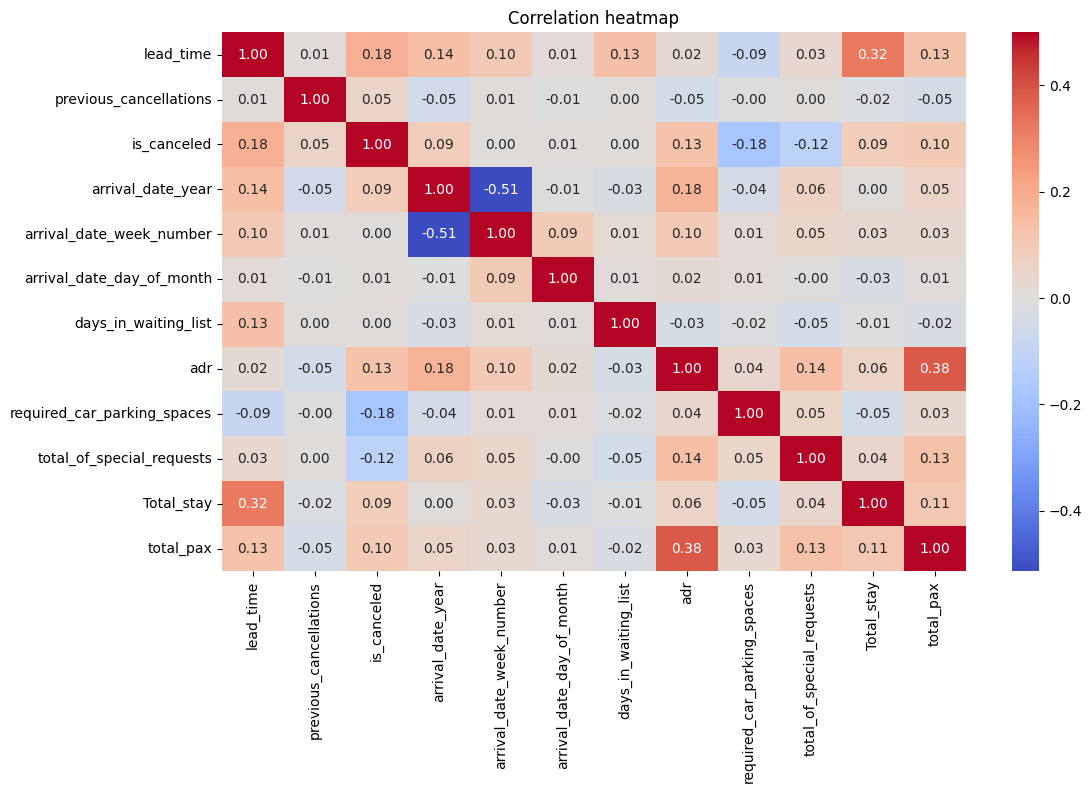

In [ ]:
#Corelation matrix:
Corr_mat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(Corr_mat,annot=True,cmap='coolwarm',fmt='.2f',vmax=.5)
plt.title('Correlation heatmap')



1.In this we can see, arrival_date_year and arrival_date_week_number has good correlation which is more than 0.5

2. Total stay and lead time has slight correlation.

3. total_pax and address has slight correlation.

1. Plot between number of months and total pax per months:

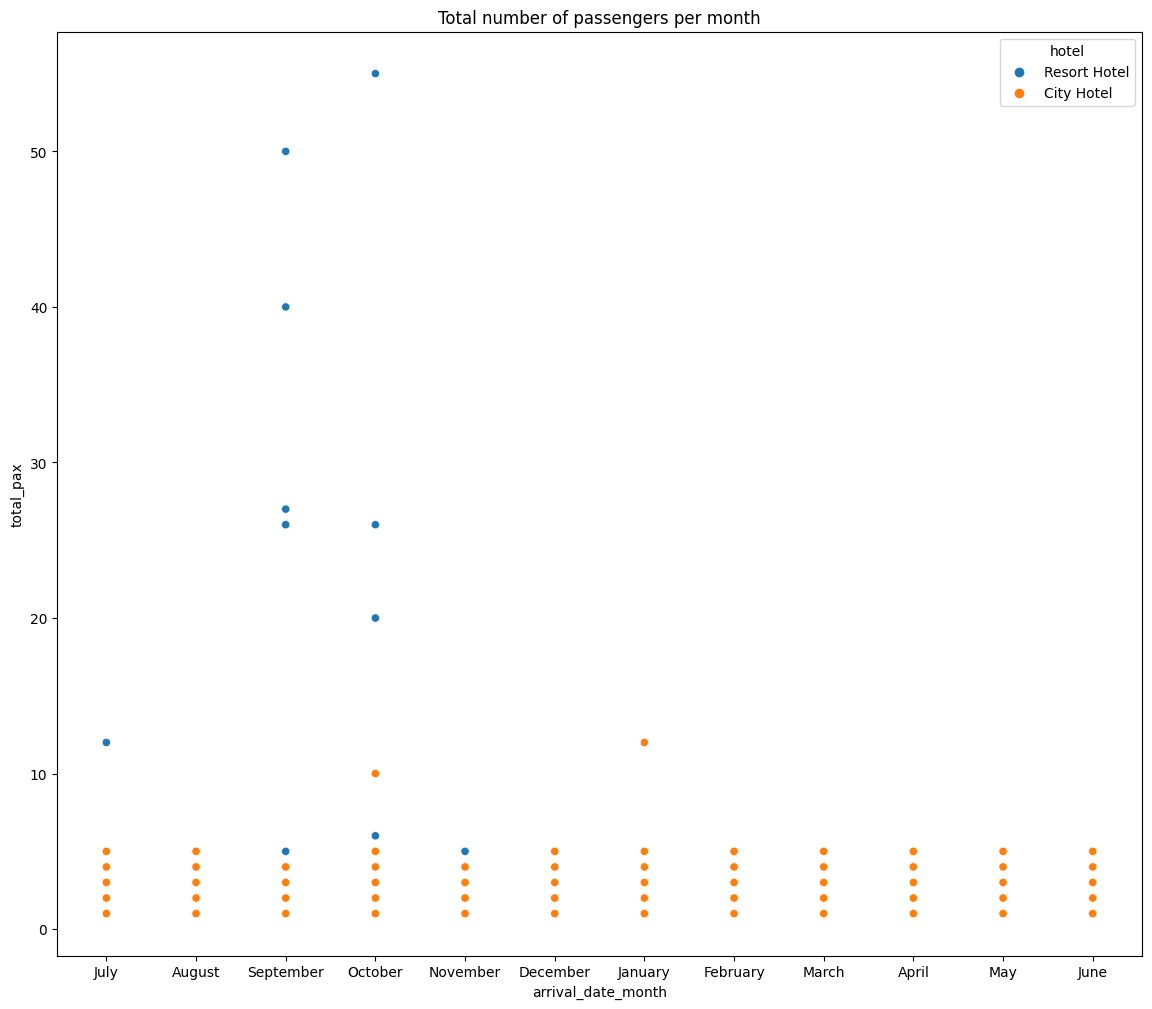

In [ ]:
#we will do scatter plotting for total number of passengers travelled per year in 2015, 2016 and 2017:
# Create a scatter plot using Seaborn
plt.figure(figsize = (14,12))
sns.scatterplot(data=df1, x="arrival_date_month", y="total_pax", hue="hotel")

# Add a title to the plot
plt.title("Total number of passengers per month")

# Show the plot
plt.show()

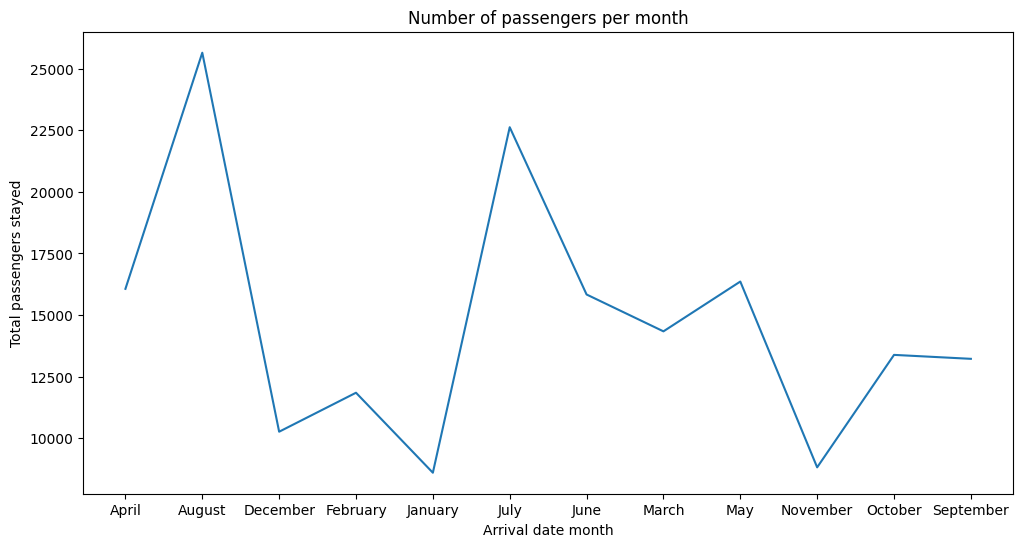

In [ ]:
Total_pax_stayed = df1.groupby('arrival_date_month')['total_pax'].sum().reset_index()
Total_pax_stayed.rename(columns = {'total_pax' : 'sum_total_pax'},inplace=True)
Total_pax_stayed.head(12)
x = Total_pax_stayed['arrival_date_month']
y = Total_pax_stayed['sum_total_pax']
plt.figure(figsize = (12,6))
plt.plot(x, y)
plt.xlabel('Arrival date month')
plt.ylabel('Total passengers stayed')
plt.title('Number of passengers per month')
plt.show()


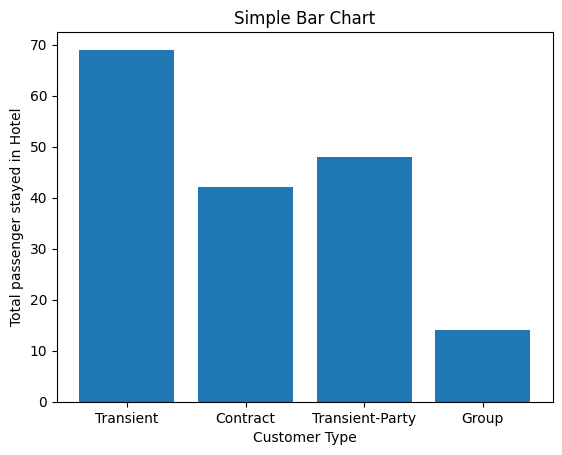

In [ ]:
#Lets do a Bar plot for customer type and total number of stay:
data = df1['Total_stay']
labels = df1['customer_type']
plt.bar(labels, data)
plt.title('Simple Bar Chart')
plt.xlabel('Customer Type')
plt.ylabel('Total passenger stayed in Hotel')
plt.show()


In [ ]:
#Lets plot a line chart between year and total number of passengers:
#Use groupby operation to sort Total passengers stayed per year:

Total_pax_stayed_year = df1.groupby('arrival_date_year')['total_pax'].sum().reset_index()
Total_pax_stayed_year.rename(columns = {'total_pax' : 'sum_total_pax'},inplace=True)
Total_pax_stayed_year.head()


,arrival_date_year,sum_total_pax
0,2015,25970
1,2016,85420
2,2017,65609


Now, we will plot how many passengers travelled in a year.

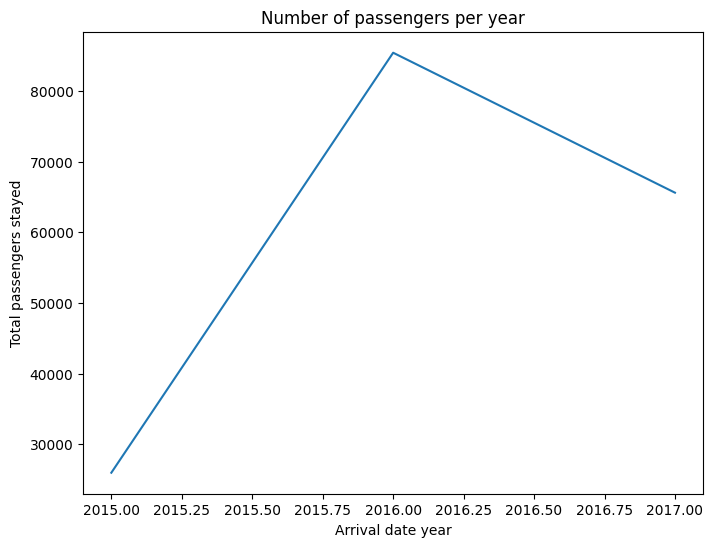

In [ ]:
x = Total_pax_stayed_year['arrival_date_year']
y = Total_pax_stayed_year['sum_total_pax']
plt.figure(figsize = (8,6))
plt.plot(x, y)
plt.xlabel('Arrival date year')
plt.ylabel('Total passengers stayed')
plt.title('Number of passengers per year')
plt.show()

# **Let see, if total stay(length of stay) affects the revenue(adr):**

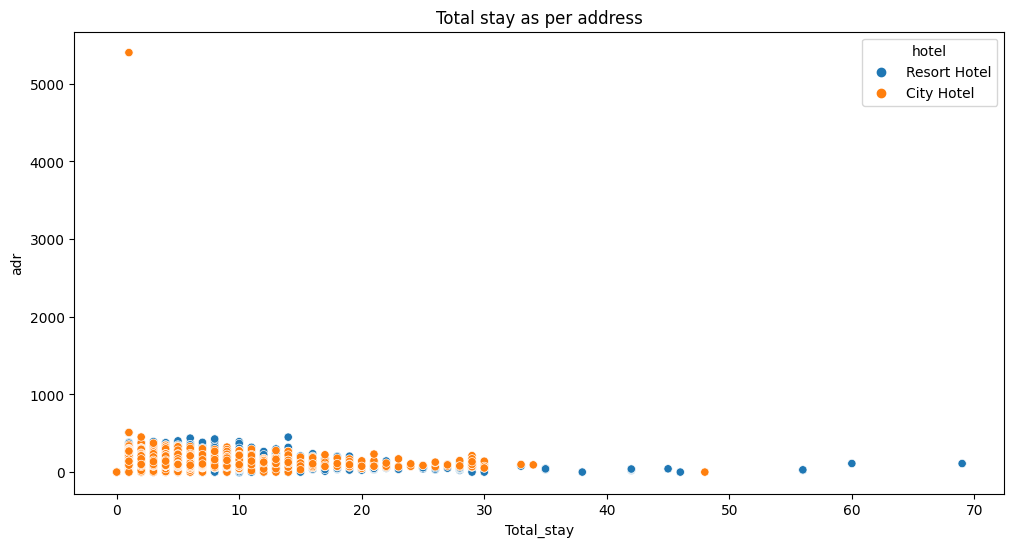

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=df1, x="Total_stay", y="adr", hue="hotel")

# Add a title to the plot
plt.title("Total stay as per address")

# Show the plot
plt.show()

We notice there is an outlier in adr, so we can rmeove it and have a better plot:


In [ ]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

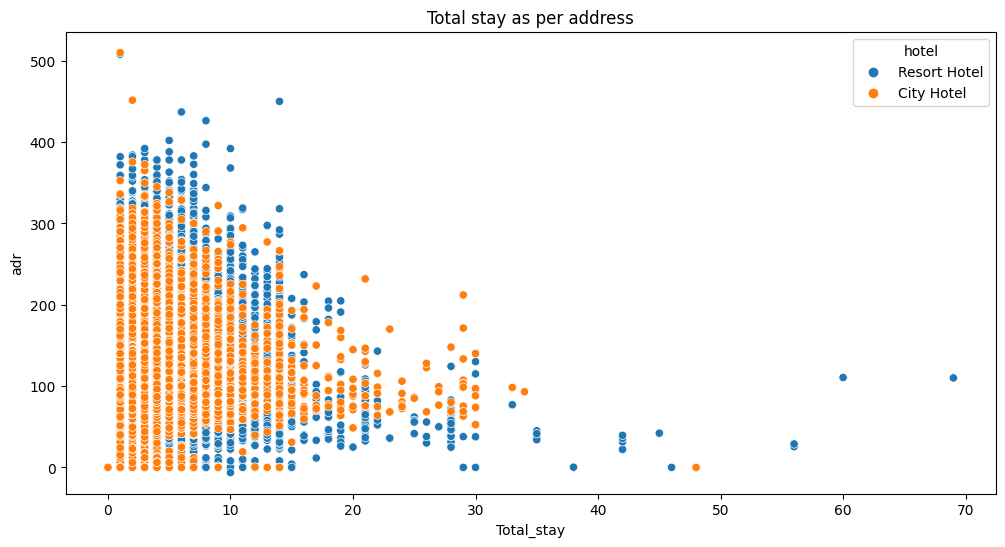

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=df1, x="Total_stay", y="adr", hue="hotel")

# Add a title to the plot
plt.title("Total stay as per address")

# Show the plot
plt.show()

**Let us see from which countries most of the customers visit these hotels?**

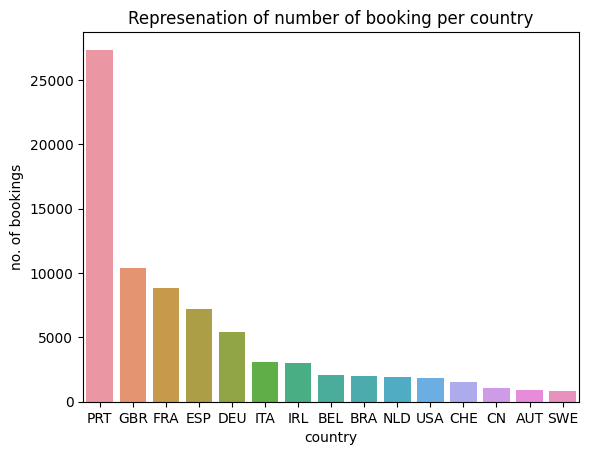

In [ ]:
grp_by_country = df1.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:15]
sns.barplot(x=d2.index,y=d2['no. of bookings'])
plt.title('Represenation of number of booking per country')
plt.show()

# **Distribution Channel wise Analysis**

Which channel is mostly used for early booking of hotels?

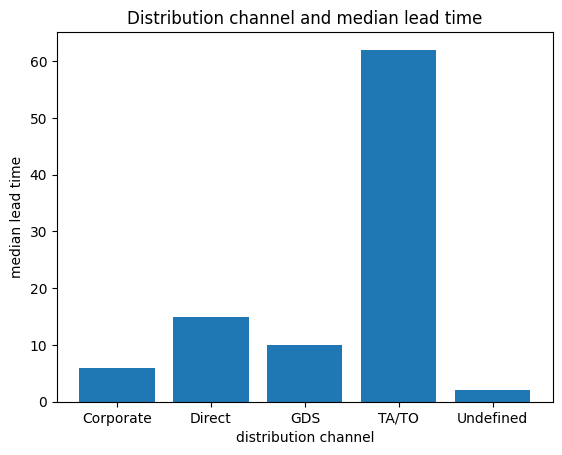

In [ ]:
group_by_dc = pd.DataFrame(df1.groupby('distribution_channel')['lead_time'].median()).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
group_by_dc

data = group_by_dc['distribution_channel']
labels = group_by_dc['median_lead_time']
plt.bar(data,labels)
plt.title('Distribution channel and median lead time')
plt.xlabel('distribution channel')
plt.ylabel('median lead time')
plt.show()


With above plot, we can see, TA/TO has the highest lead time and undfined has the lowest.

2. Which channel has longer average waiting time?

In [ ]:
group_by_dc=pd.DataFrame(df1.groupby('distribution_channel')['days_in_waiting_list'].mean().reset_index().rename(columns = {'days_in_waiting_list':'average_wait_time'}))
group_by_dc


,distribution_channel,average_wait_time
0,Corporate,0.196168
1,Direct,0.368766
2,GDS,0.000000
3,TA/TO,0.859504
4,Undefined,0.000000


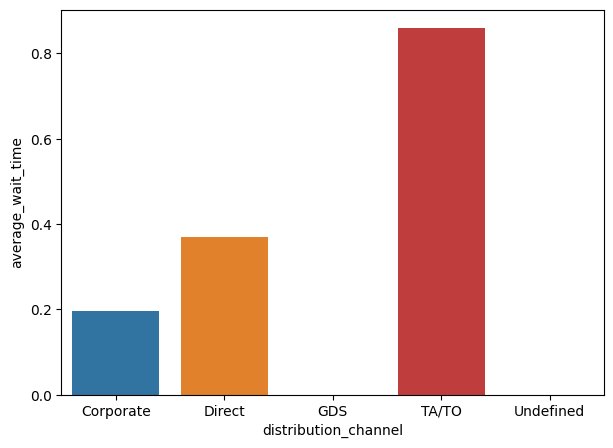

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(x = group_by_dc['distribution_channel'], y = group_by_dc['average_wait_time'])
plt.show()

TA/TO has the longest wait time. This can be because it has the highest lead time too in 1st graph.

# **Pie chart with distribution channel and total passengers:**

Below is the pie chart between distribution channel and total passengers. By this chart, we can see, which distribution channel has most passegers bookings?

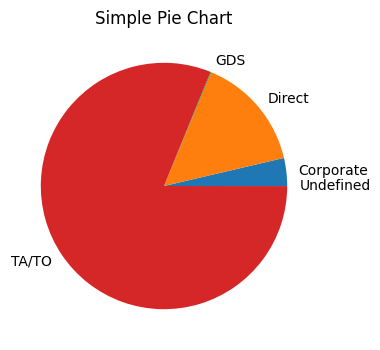

In [ ]:
dc = pd.DataFrame(df1.groupby('distribution_channel')['total_pax'].sum()/df1['total_pax'].sum()*100)
dc
plt.figure(figsize=(4,4))
x = dc.index
y = dc['total_pax']
plt.pie(y, labels=x)
plt.title('Simple Pie Chart')
plt.show()


# **Hotel wise analysis**

 What is percentage of bookings in each hotel?

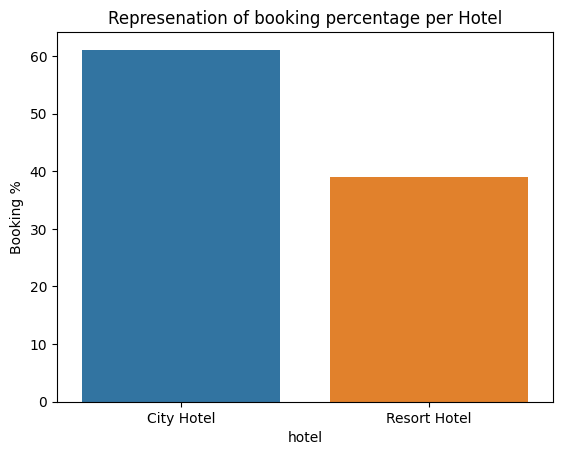

In [ ]:
grp_by_hotel = df1.groupby('hotel')
d2=pd.DataFrame(grp_by_hotel.size()/df1.shape[0]*100).reset_index().rename(columns = {0:'Booking %'})
sns.barplot(x=d2['hotel'],y=d2['Booking %'])
plt.title('Represenation of booking percentage per Hotel')
plt.show()

 Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

What is preferred stay in each hotel?

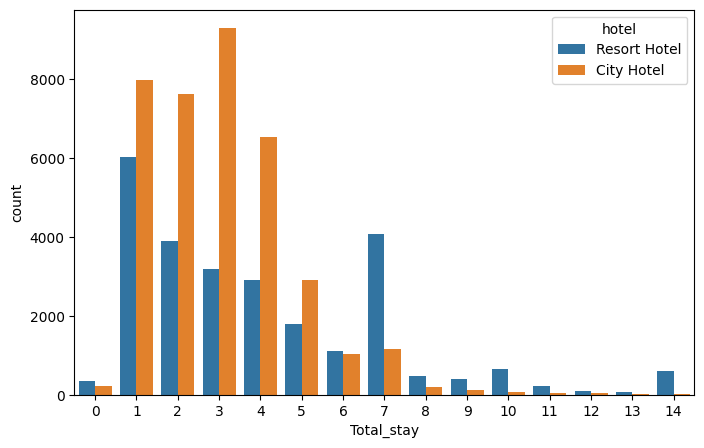

In [ ]:
not_cancelled = df1[df1['is_canceled'] == 0]
s1 = not_cancelled[not_cancelled['Total_stay']<15]
plt.figure(figsize = (8,5))
sns.countplot(x=s1['Total_stay'], hue = s1['hotel'])
plt.show()


With this graph, we can say like city hotel is mostly preferred for stay.

# **Time wise Analysis**

Now lets see which month results in high revenue.

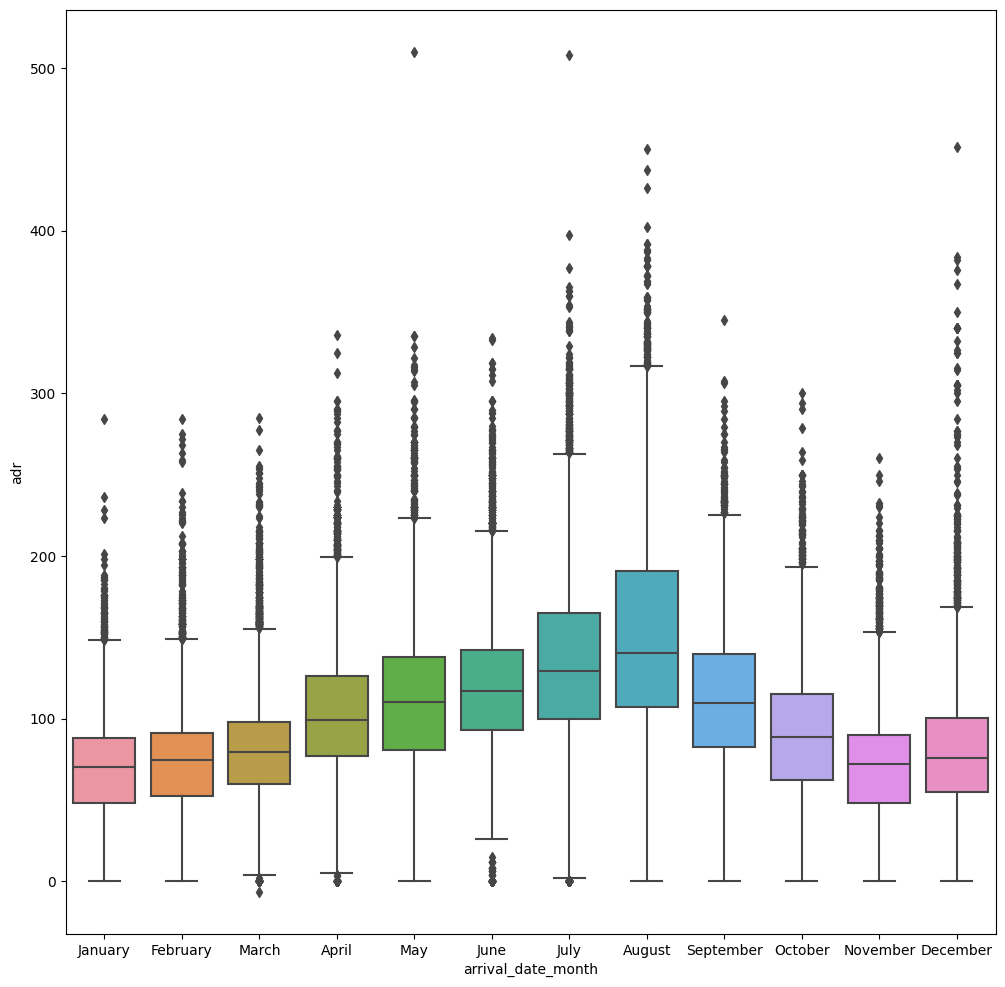

In [ ]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (12,12))
sns.boxplot(x = df1['arrival_date_month'],y = df1['adr'])
plt.show()

Avg adr(revenue) rises from beginning of year upto middle of year and reaches peak at August and then lowers to the end of year. But hotels do make some good deals with high adr at end of year also.

Now let us check the trend of arrival_num and avg adr for each day of month.

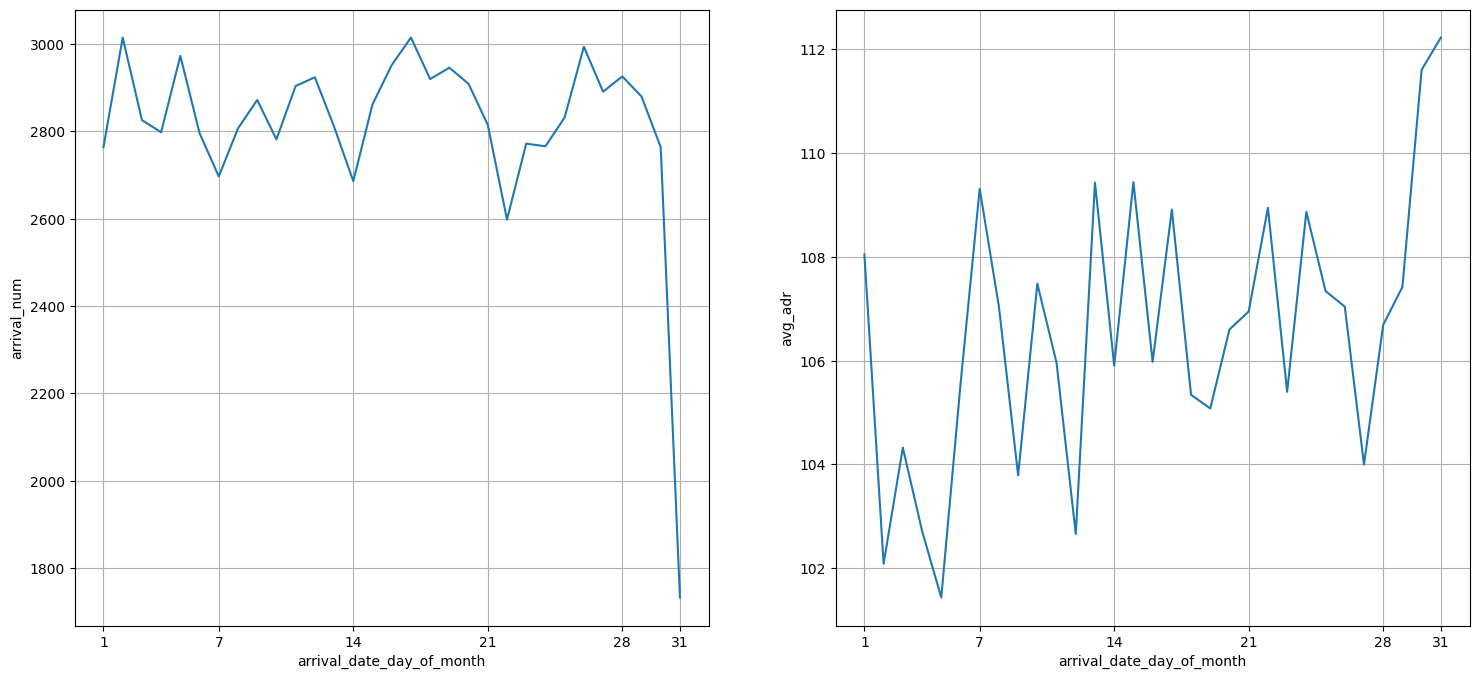

In [ ]:
d6=pd.DataFrame(df1.groupby('arrival_date_day_of_month').size()).rename(columns = {0:'arrival_num'})
d6['avg_adr'] = df1.groupby('arrival_date_day_of_month')['adr'].mean()
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival num for each day of month
g= sns.lineplot(ax = axes[0],x = d6.index, y = d6['arrival_num'])
g.grid()
g.set_xticks([1,7,14,21,28,31])

# Plotting avg adr for each day of month
h= sns.lineplot(ax = axes[1],x = d6.index, y = d6['avg_adr'])
h.grid()
h.set_xticks([1,7,14,21,28,31])

#show the plot
plt.show()



We can see that graph arrival_num has small peaks at regular interval of days. This can be due to increase in arrival weekend.

Also the avg adr tends to go up as month ends. Therefore charge more at the end of month.

Let us divide our customers in three categories of single, couple and family/friends. then check their booking %

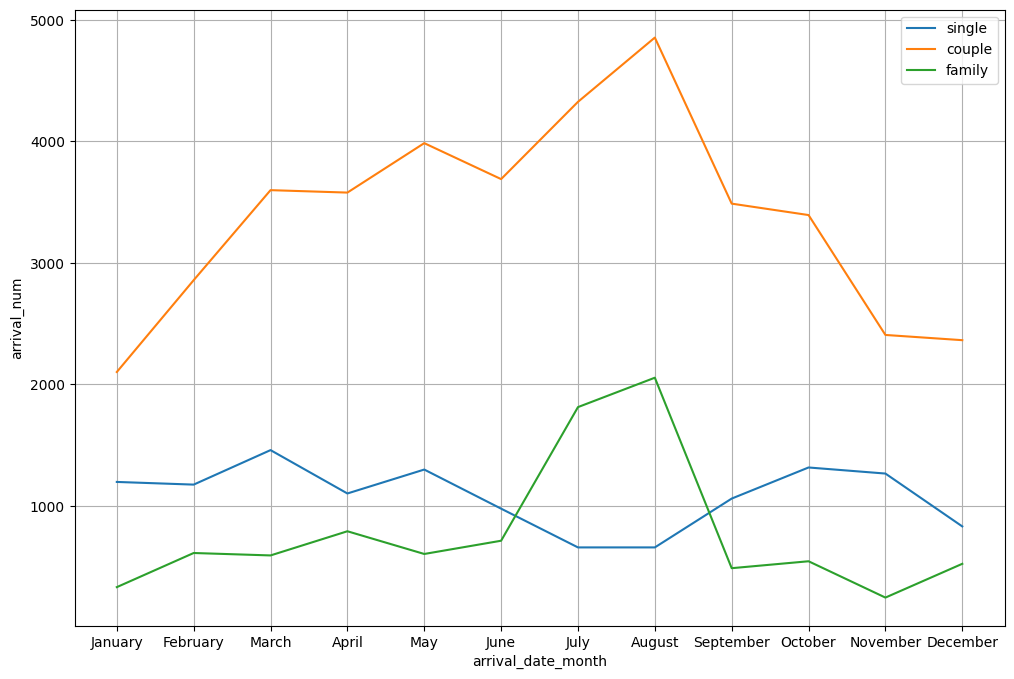

In [ ]:
## Select single, couple, multiple adults and family
single   = not_cancelled[(not_cancelled['adults']==1) & (not_cancelled['children']==0) & (not_cancelled['babies']==0)]
couple   = not_cancelled[(not_cancelled['adults']==2) & (not_cancelled['children']==0) & (not_cancelled['babies']==0)]
family   = not_cancelled[not_cancelled['adults'] + not_cancelled['children'] + not_cancelled['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)

plt.grid()
plt.show()

Moslty bookings are done by couples(although we are not sure that they are couple as data doesn't tell about that)

It is clear from graph that their is a sudden surge in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers